In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('Dataset/ESGData.csv')

# Display the first few rows to verify the data
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN,NaN
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.641062,10.437876,6.277652,5.261868,6.385551,8.190277,NaN,NaN,NaN,NaN
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.055593,0.079402,0.086177,0.076670,0.085885,0.047916,NaN,NaN,NaN,NaN
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,27.835643,27.826564,27.845522,27.847925,27.866972,...,36.534503,36.607475,36.624759,36.610850,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Calculate percentage of null values in each column
null_percentage = df.isnull().sum() / len(df) * 100

In [4]:
year_columns = [col for col in df.columns if col.isdigit() and null_percentage[col] < 40]
columns_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + year_columns
df = df[columns_to_keep]

In [5]:
# Verify the shape of the cleaned dataset
print("Final shape:", df.shape)
print("\nYears kept:", sorted(year_columns))
print("\nRemaining null values percentage:\n", (df.isnull().sum() / len(df) * 100).round(2))

Final shape: (16013, 17)

Years kept: ['2000', '2002', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

Remaining null values percentage:
 Country Name       0.00
Country Code       0.00
Indicator Name     0.00
Indicator Code     0.00
2000              38.72
2002              38.12
2004              39.19
2005              37.13
2006              38.66
2007              36.37
2008              38.94
2009              37.84
2010              35.62
2011              37.14
2012              35.44
2013              39.14
2014              38.43
dtype: float64


In [6]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,73.702495,76.258066,78.094440,79.062000,79.851681,80.570536,81.210886,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,78.479364,77.999111,79.537184,80.574728,84.621206,82.926878,83.644992,84.270921,86.959991,87.199474,87.512260,88.129881,87.275323
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,10.316367,7.957603,10.899546,13.506496,13.688121,12.303601,13.997417,8.721330,9.966140,13.002144,12.850205,11.641062,10.437876
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,0.031326,0.039431,0.038631,0.031945,0.034333,0.030291,0.042815,0.051040,0.052809,0.060245,0.061942,0.055593,0.079402
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,36.310596,36.369508,36.484362,36.540501,36.489221,36.494163,36.412954,36.372261,36.425990,36.440808,36.472300,36.534503,36.607475


In [7]:
# Unpivot Dataframe
df_melted = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year',
                    value_name='Value')

In [8]:
df_melted

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2000,73.702495
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,2000,78.479364
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,2000,10.316367
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,2000,0.031326
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,2000,36.310596
...,...,...,...,...,...,...
208164,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2014,5.000000
208165,Zimbabwe,ZWE,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,2014,NaN
208166,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2014,5.330000
208167,Zimbabwe,ZWE,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,2014,10.400000


In [9]:
# Convert Year to integer type
df_melted['Year'] = df_melted['Year'].astype(int)

In [10]:
# Sort by Year and other relevant columns
df_melted = df_melted.sort_values(['Year', 'Country Name', 'Indicator Name'])
df_melted

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
3082,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2000,8.800000
3083,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,2000,NaN
3084,Afghanistan,AFG,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,2000,NaN
3085,Afghanistan,AFG,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,2000,NaN
3086,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,2000,57.827099
...,...,...,...,...,...,...
208164,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2014,5.000000
208165,Zimbabwe,ZWE,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,2014,NaN
208166,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2014,5.330000
208167,Zimbabwe,ZWE,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,2014,10.400000


In [11]:
# Display the first few rows to verify the transformation
print("\nTransposed DataFrame:")
df_melted.head()


Transposed DataFrame:


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
3082,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2000,8.800000
3083,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,2000,NaN
3084,Afghanistan,AFG,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,2000,NaN
3085,Afghanistan,AFG,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,2000,NaN
3086,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,2000,57.827099


In [12]:
print("\nNew shape:", df_melted.shape)


New shape: (208169, 6)


In [13]:
# Calculate mean value for each indicator
indicator_means = df_melted.groupby('Indicator Name')['Value'].mean().sort_values(ascending=False)
indicator_means

Indicator Name
Patent applications, residents                                           68333.865591
Scientific and technical journal articles                                57071.443856
Energy use (kg of oil equivalent per capita)                              2266.675974
Population density (people per sq. km of land area)                        224.570601
Food production index (2004-2006 = 100)                                    107.023462
                                                                             ...     
Heat Index 35 (projected change in days)                                          NaN
Mammal species, threatened                                                        NaN
Maximum 5-day Rainfall, 25-year Return Level (projected change in mm)             NaN
Mean Drought Index (projected change, unitless)                                   NaN
Terrestrial and marine protected areas (% of total territorial area)              NaN
Name: Value, Length: 67, dtype: float64

In [14]:
# Get top 5 indicators
top_5_indicators = indicator_means.head(5).index.tolist()
top_5_indicators

['Patent applications, residents',
 'Scientific and technical journal articles',
 'Energy use (kg of oil equivalent per capita)',
 'Population density (people per sq. km of land area)',
 'Food production index (2004-2006 = 100)']

In [15]:
# Filter data for top 5 indicators
top_5_df = df_melted[df_melted['Indicator Name'].isin(top_5_indicators)]
top_5_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
3100,Afghanistan,AFG,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,2000,NaN
3102,Afghanistan,AFG,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,2000,86.040000
3124,Afghanistan,AFG,"Patent applications, residents",IP.PAT.RESD,2000,NaN
3130,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,2000,31.829110
3143,Afghanistan,AFG,Scientific and technical journal articles,IP.JRN.ARTC.SC,2000,4.000000
...,...,...,...,...,...,...
208120,Zimbabwe,ZWE,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,2014,NaN
208122,Zimbabwe,ZWE,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,2014,91.230000
208144,Zimbabwe,ZWE,"Patent applications, residents",IP.PAT.RESD,2014,NaN
208150,Zimbabwe,ZWE,Population density (people per sq. km of land ...,EN.POP.DNST,2014,35.121316


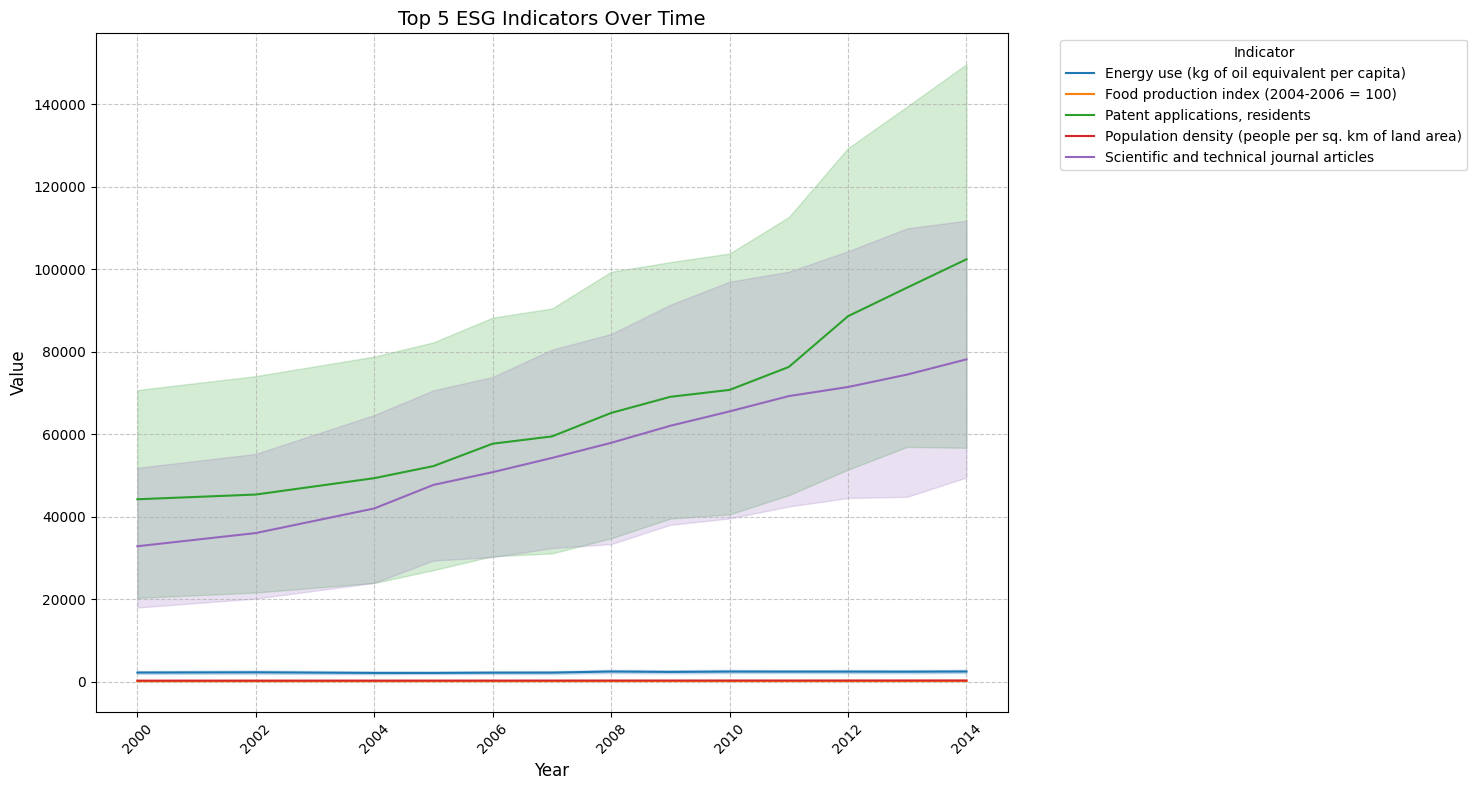

In [17]:
# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_5_df, x='Year', y='Value', hue='Indicator Name')

# Customize the plot
plt.title('Top 5 ESG Indicators Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the visuals
plt.savefig("Top5_ESG_Indicators.png")

# Show the plot
plt.show()

In [18]:
# Print the top 5 indicators and their mean values
print("\nTop 5 ESG Indicators by Average Value:")
for indicator, mean_value in indicator_means.head(5).items():
    print(f"{indicator}: {mean_value:.2f}")


Top 5 ESG Indicators by Average Value:
Patent applications, residents: 68333.87
Scientific and technical journal articles: 57071.44
Energy use (kg of oil equivalent per capita): 2266.68
Population density (people per sq. km of land area): 224.57
Food production index (2004-2006 = 100): 107.02


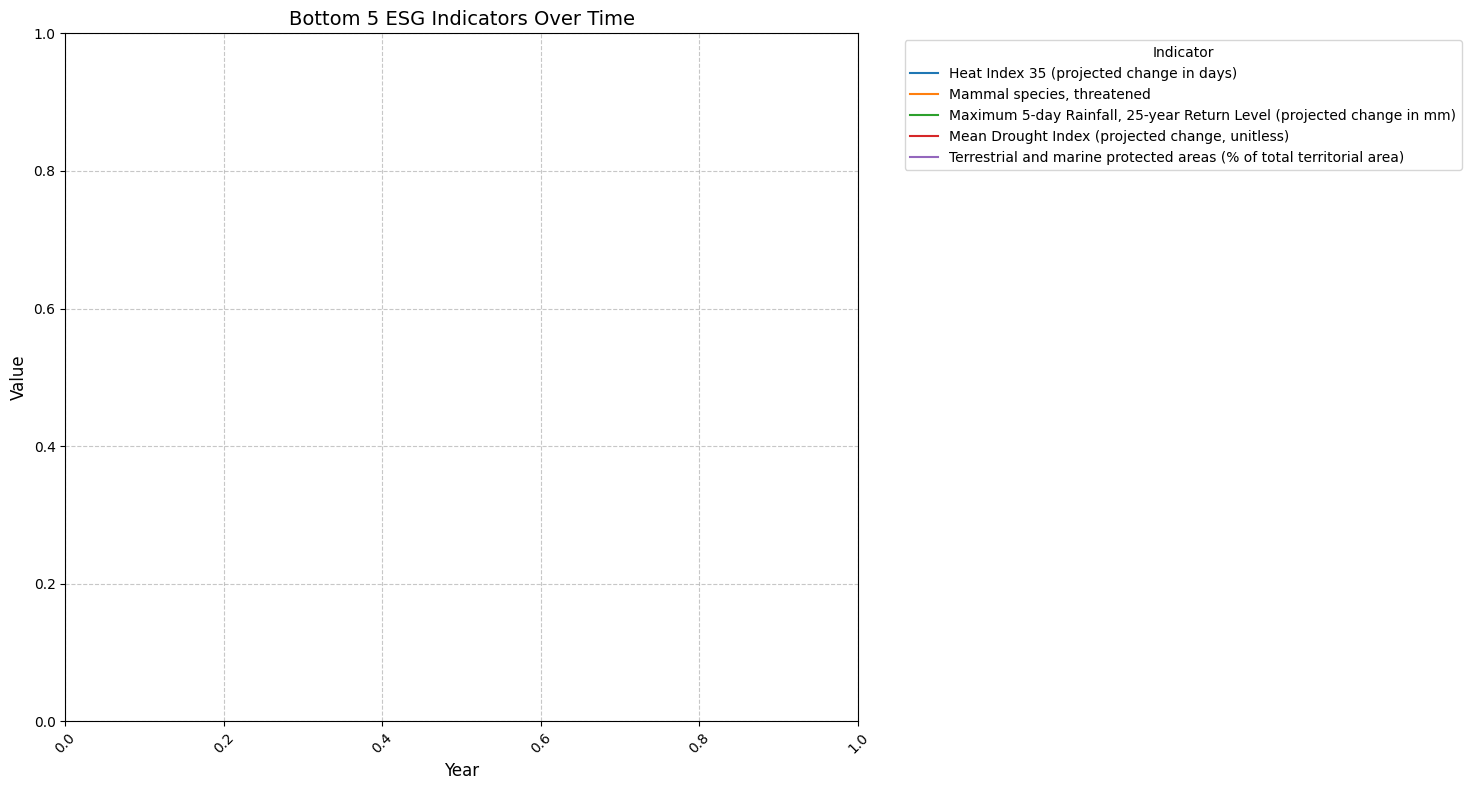


Bottom 5 ESG Indicators being plotted:
Maximum 5-day Rainfall, 25-year Return Level (projected change in mm): nan
Mean Drought Index (projected change, unitless): nan
Terrestrial and marine protected areas (% of total territorial area): nan


In [19]:
# 1. Trend Analysis for Bottom 5 Indicators
bottom_5_indicators = indicator_means.tail(5).index.tolist()
bottom_5_df = df_melted[df_melted['Indicator Name'].isin(bottom_5_indicators)]

# Check if data exists
if not bottom_5_df.empty:
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=bottom_5_df, x='Year', y='Value', hue='Indicator Name')
    plt.title('Bottom 5 ESG Indicators Over Time', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.savefig("Bottom_5_ESG_Indicator.png")
    plt.show()
    
    # Print the indicators being plotted
    print("\nBottom 5 ESG Indicators being plotted:")
    for indicator, mean_value in indicator_means.tail(3).items():
        print(f"{indicator}: {mean_value:.2f}")
else:
    print("No data available for bottom 5 indicators")

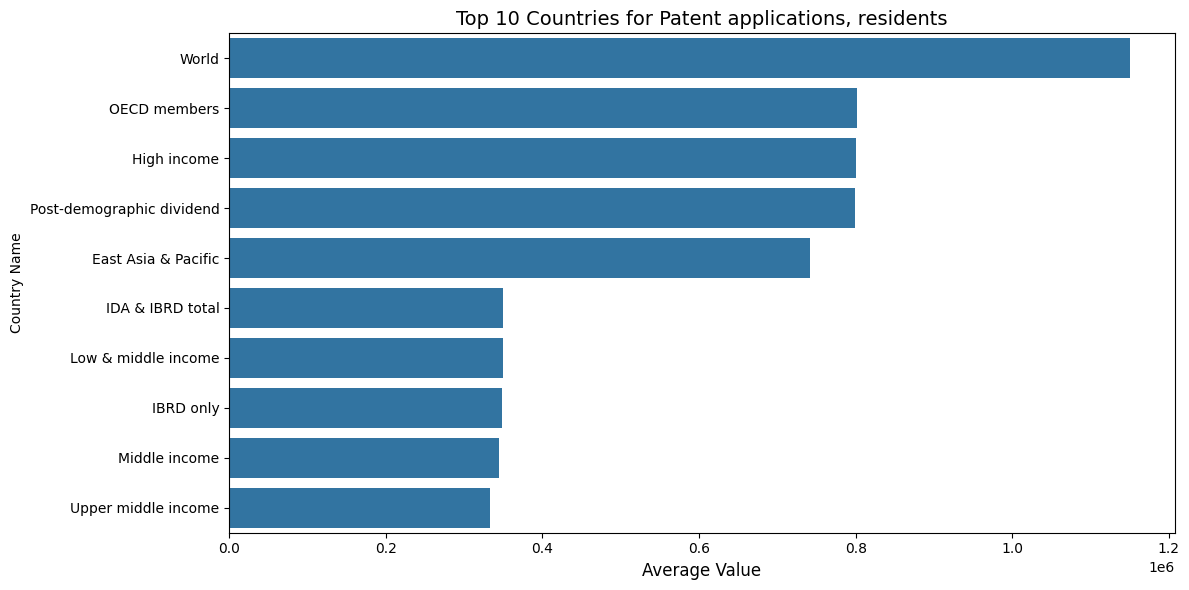

In [21]:
# 2. Regional Analysis for Top Indicators
# Group by regions (you might want to create a region mapping)
top_countries = df_melted[df_melted['Indicator Name'] == top_5_indicators[0]].groupby('Country Name')['Value'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title(f'Top 10 Countries for {top_5_indicators[0]}', fontsize=14)
plt.xlabel('Average Value', fontsize=12)
plt.tight_layout()
plt.savefig("Top10_countries.png")
plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_10468\1919613556.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  top_indicator_df['YoY_Change'] = top_indicator_df.groupby('Country Name')['Value'].pct_change() * 100


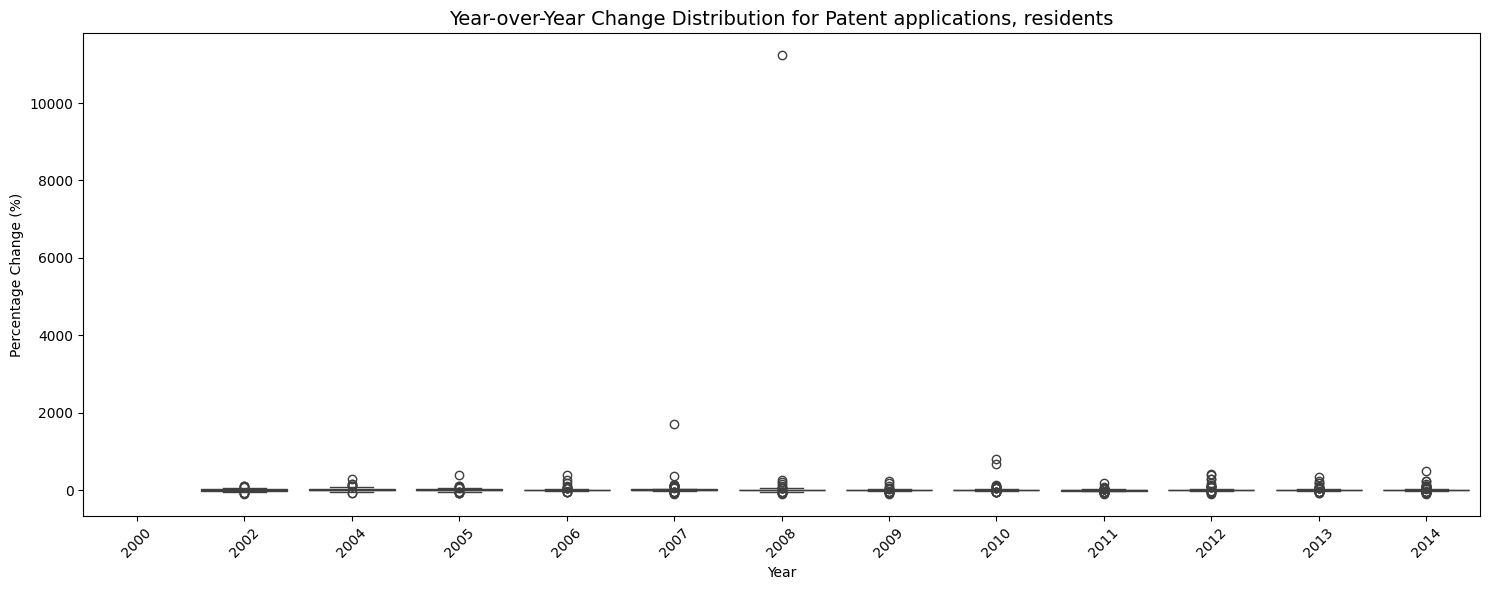

In [23]:
# 3. Year-over-Year Change Analysis
# Calculate year-over-year change for top indicator
top_indicator_df = df_melted[df_melted['Indicator Name'] == top_5_indicators[0]].copy()
top_indicator_df['YoY_Change'] = top_indicator_df.groupby('Country Name')['Value'].pct_change() * 100

plt.figure(figsize=(15, 6))
sns.boxplot(data=top_indicator_df, x='Year', y='YoY_Change')
plt.title(f'Year-over-Year Change Distribution for {top_5_indicators[0]}', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Percentage Change (%)')
plt.tight_layout()
plt.savefig("boxplot.png")
plt.show()

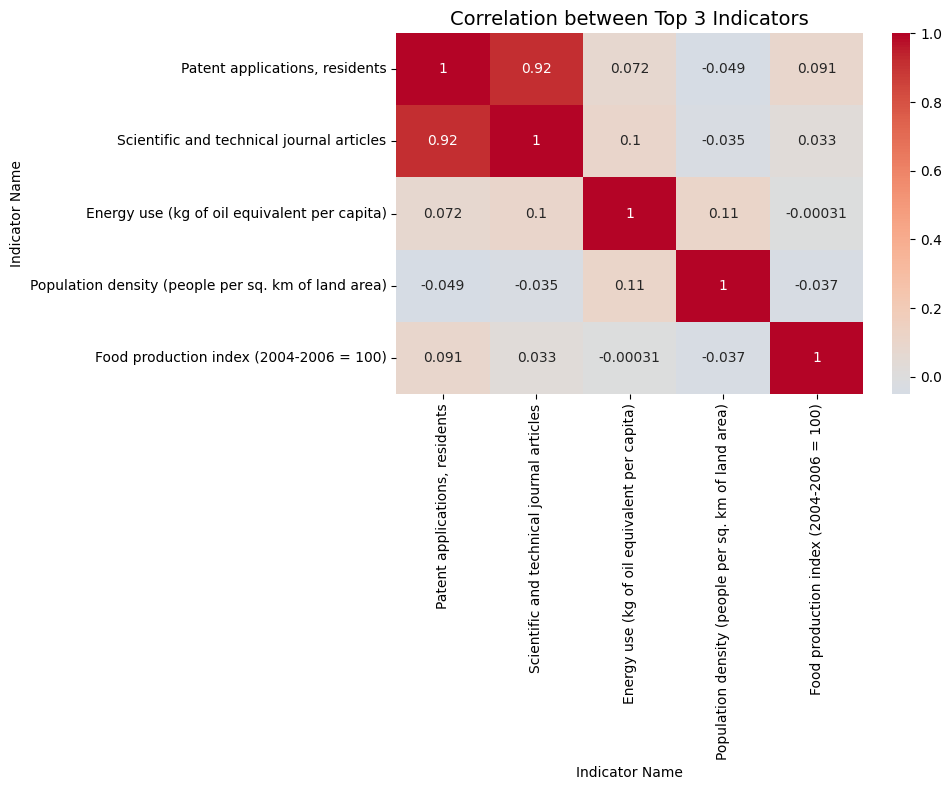

In [24]:
# 4. Correlation Analysis between Top Indicators
pivot_df = df_melted.pivot_table(
    index=['Country Name', 'Year'],
    columns='Indicator Name',
    values='Value'
).reset_index()

correlation = pivot_df[top_5_indicators].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Top 3 Indicators', fontsize=14)
plt.tight_layout()
plt.savefig("Correlation between Top 3 Indicators.png")
plt.show()


In [25]:
# 5. Summary Statistics
print("\nSummary Statistics for Top 5 Indicators:")
for indicator in top_5_indicators:
    indicator_stats = df_melted[df_melted['Indicator Name'] == indicator]['Value'].describe()
    print(f"\n{indicator}:")
    print(indicator_stats)



Summary Statistics for Top 5 Indicators:

Patent applications, residents:
count    1.674000e+03
mean     6.833387e+04
std      1.995767e+05
min      1.000000e+00
25%      7.100000e+01
50%      7.490000e+02
75%      8.834250e+03
max      1.713038e+06
Name: Value, dtype: float64

Scientific and technical journal articles:
count    3.107000e+03
mean     5.707144e+04
std      2.041032e+05
min      0.000000e+00
25%      3.208500e+01
50%      4.308000e+02
75%      1.010850e+04
max      2.263604e+06
Name: Value, dtype: float64

Energy use (kg of oil equivalent per capita):
count     2452.000000
mean      2266.675974
std       2656.364850
min          9.548031
25%        604.481034
50%       1308.732096
75%       2972.238534
max      22120.371575
Name: Value, dtype: float64

Population density (people per sq. km of land area):
count     3089.000000
mean       224.570601
std       1203.297334
min          1.543177
25%         31.390446
50%         65.661779
75%        131.288522
max      18412

In [26]:
# 6. Volatility Analysis
volatility = df_melted.groupby('Indicator Name')['Value'].std().sort_values(ascending=False)
print("\nIndicator Volatility (Standard Deviation):")
print(volatility.head())


Indicator Volatility (Standard Deviation):
Indicator Name
Net migration                                          3.785405e+06
Scientific and technical journal articles              2.041032e+05
Patent applications, residents                         1.995767e+05
Energy use (kg of oil equivalent per capita)           2.656365e+03
Population density (people per sq. km of land area)    1.203297e+03
Name: Value, dtype: float64


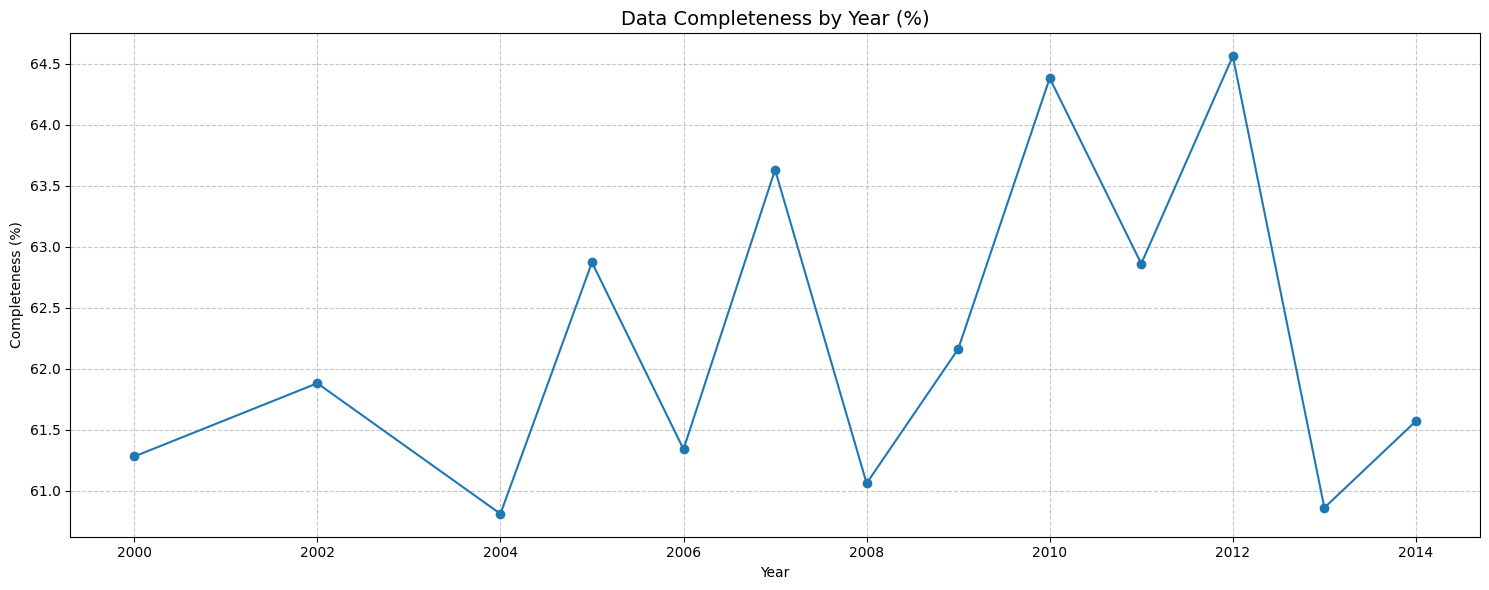

In [28]:
# 7. Missing Data Analysis by Year
yearly_completeness = df_melted.groupby('Year').apply(
    lambda x: (x['Value'].notna().sum() / len(x)) * 100
).round(2)

plt.figure(figsize=(15, 6))
yearly_completeness.plot(kind='line', marker='o')
plt.title('Data Completeness by Year (%)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Completeness (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("data_completeness.png")
plt.show()

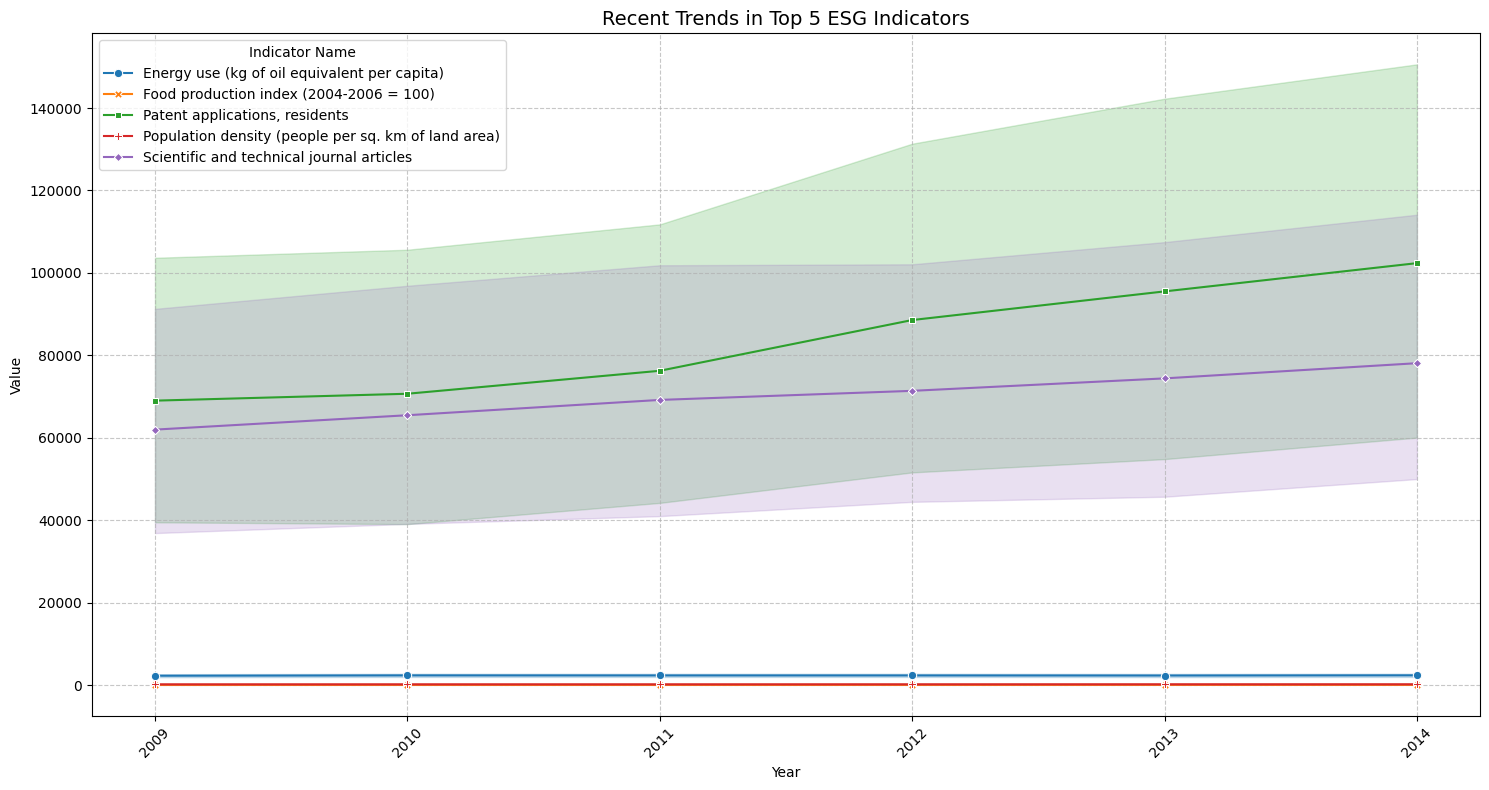

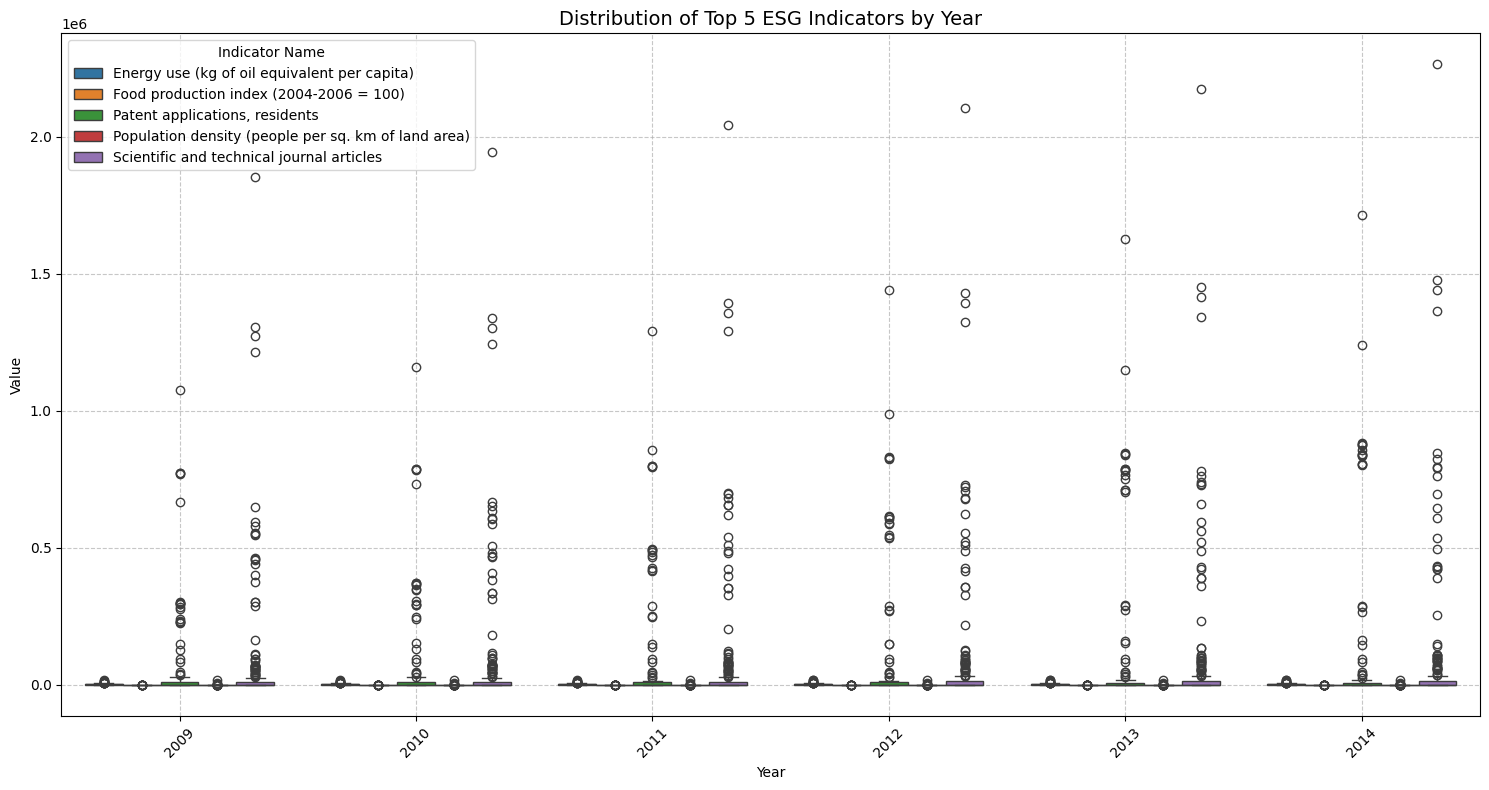

In [29]:
# 8. Recent Trends (Last 5 Years)
recent_years = df_melted['Year'].astype(int).max() - 5
recent_trends = df_melted[
    (df_melted['Year'].astype(int) >= recent_years) & 
    (df_melted['Indicator Name'].isin(top_5_indicators))
]

# Line plot for trends
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=recent_trends,
    x='Year',
    y='Value', 
    hue='Indicator Name',
    style='Indicator Name',
    markers=True,
    dashes=False
)
plt.title('Recent Trends in Top 5 ESG Indicators', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(".png
plt.show()

# Box plot to show distribution by year
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=recent_trends,
    x='Year',
    y='Value',
    hue='Indicator Name'
)
plt.title('Distribution of Top 5 ESG Indicators by Year', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
